In [27]:
import pandas as pd
import pickle
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LGR
import matplotlib.pyplot as plt

# Load Datasets
print("Loading datasets...")
Xs = pickle.load(open('binarized_xs.pkl', 'rb'))
ys = pickle.load(open('binarized_ys.pkl', 'rb'))
print("Done.")

Loading datasets...
Done.


In [28]:
# Setup alphas list for BernoulliNB parameter
penalties = [10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6,10**7]

# Setup data structures to hold train, test results
l2_model_complexity = np.zeros((10, 15))
l2_model_numzeros = np.zeros((10,15))
l2_train_cll = np.zeros((10, 15))
l2_test_cll = np.zeros((10, 15))

l1_model_numzeros = np.zeros((10,15))


In [29]:
# CAUTION! THE BELOW LOOP TAKES A GOOD WHILE TO RUN. 

for i in range(0,10):
    idx = 0
    # Split datasets
    x_train, x_test, y_train, y_test = train_test_split(Xs[i], ys[i], test_size=1./3, random_state=7000)
    for j in penalties:
        # Make and fit classifier model using L2
        clf = LGR(random_state = 42, C = j, penalty = "l2").fit(x_train, y_train)
        
        # Obtain weights and compute model complexity, store
        A = clf.coef_[0]
        w0 = clf.intercept_[0]
        l2_model_complexity[i][idx] = np.sum(A**2) + (w0**2) # = complexity
        
        # Compute number of 0 weights, store
        nzeros = (A == 0).sum()
        if(w0 == 0):
            nzeros = nzeros + 1
        l2_model_numzeros[i][idx] = nzeros
        
        # Compute CLL on train, store
        total_res = clf.predict_log_proba(x_train)
        y_train_binary = y_train*1
        entry_val = 0
        for k in range(0,len(y_train)):
            entry_val += total_res[k][y_train_binary[k]]
        l2_train_cll[i][idx] = entry_val
        
        # Compute CLL on test, store
        total_res = clf.predict_log_proba(x_test)
        y_test_binary = y_test*1
        entry_val = 0
        for k in range(0,len(y_test)):
            entry_val += total_res[k][y_test_binary[k]]
        l2_test_cll[i][idx] = entry_val
        
        # Make and fit classifier model using L1
        clf_L1 = LGR(random_state = 42, C = j, penalty = "l1").fit(x_train, y_train)
        
        # Obtain weights
        A = clf_L1.coef_[0]
        w0 = clf_L1.intercept_[0]
        
        # Compute number of 0 weights, store
        nzeros = (A == 0).sum()
        if(w0 == 0):
            nzeros = nzeros + 1
        l1_model_numzeros[i][idx] = nzeros

        idx += 1
        
pickle.dump((l2_model_complexity, l2_train_cll, l2_test_cll, l2_model_numzeros, l1_model_numzeros), open('results.pkl', 'wb'))


/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1363: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


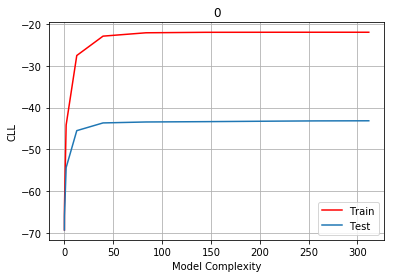

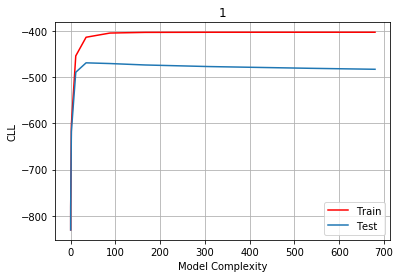

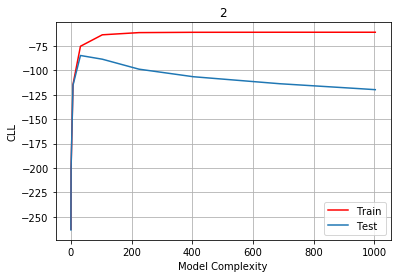

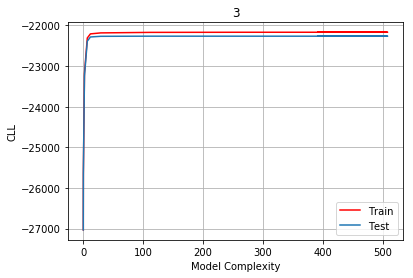

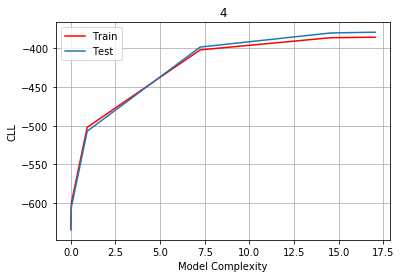

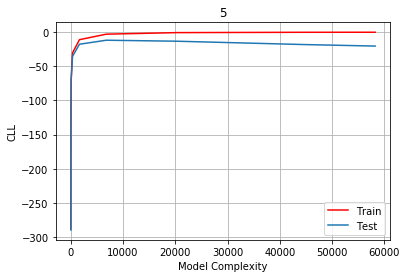

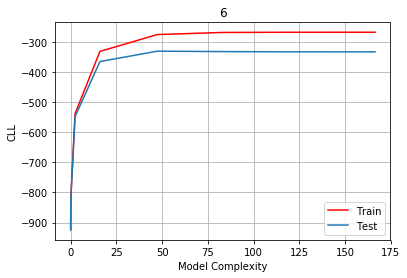

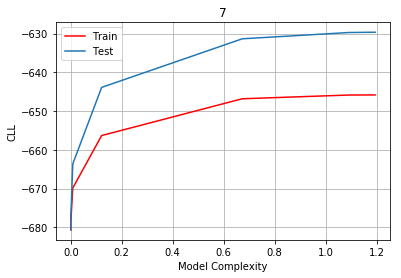

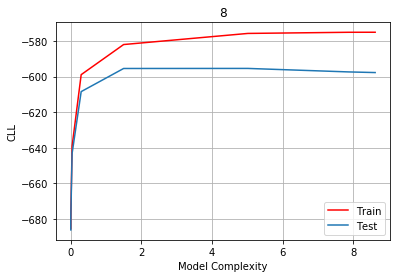

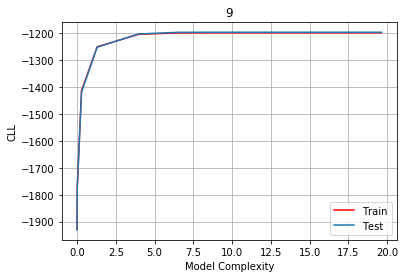

In [24]:
# Plotting 10 graphs of train/test CLL vs model complexity for L2

for i in range(0,10):
    fig, ax = plt.subplots()
    ax.plot(l2_model_complexity[i], l2_train_cll[i],'r', label="Train")
    ax.plot(l2_model_complexity[i], 2*l2_test_cll[i], label="Test")
    plt.xlabel("Model Complexity")
    plt.ylabel("CLL")
    plt.title(i)
    plt.legend()
    ax.grid()
    #fig.savefig("favorite_complexity_vs_overfit.png")
    plt.show()

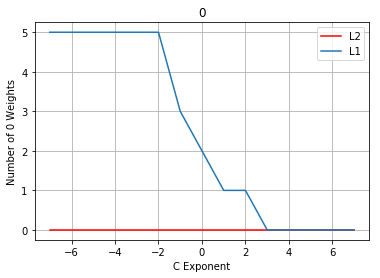

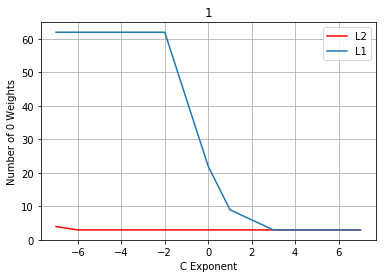

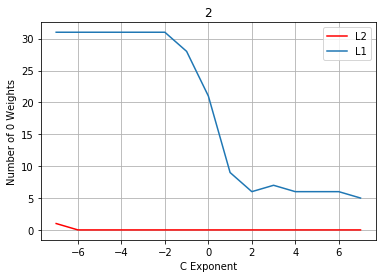

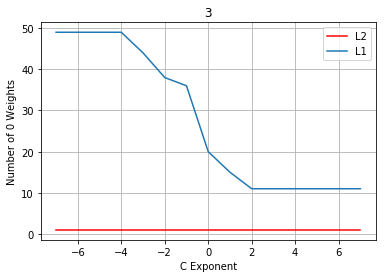

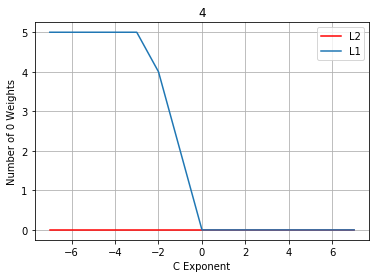

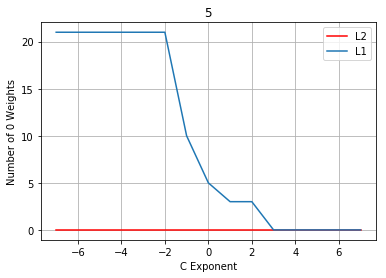

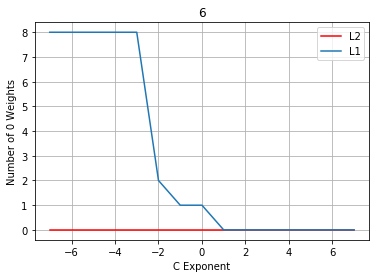

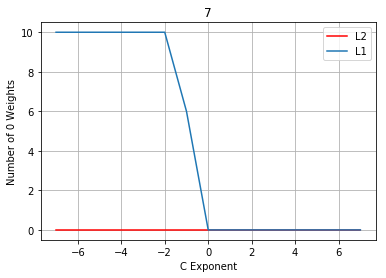

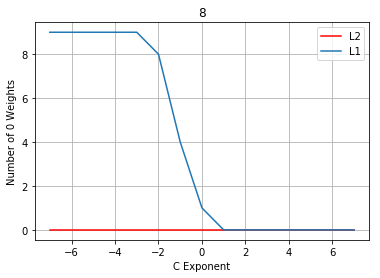

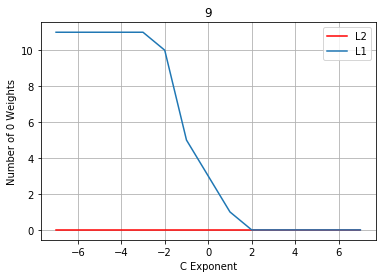

In [17]:
# Plotting 10 graphs of number of 0 weights L2&L1 vs exponent of C
C_exp = [-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7]
for i in range(0,10):
    fig, ax = plt.subplots()
    ax.plot(C_exp, l2_model_numzeros[i],'r', label="L2")
    ax.plot(C_exp, l1_model_numzeros[i], label="L1")
    plt.xlabel("C Exponent")
    plt.ylabel("Number of 0 Weights")
    plt.title(i)
    plt.legend()
    ax.grid()
    #fig.savefig("favorite_feature_selection.png")
    plt.show()

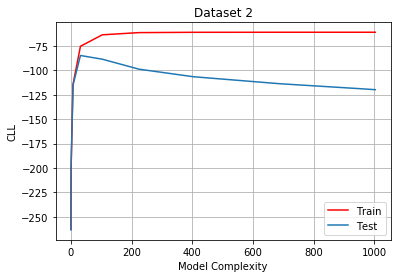

In [31]:
fig, ax = plt.subplots()
ax.plot(l2_model_complexity[2], l2_train_cll[2],'r', label="Train")
ax.plot(l2_model_complexity[2], 2*l2_test_cll[2], label="Test")
plt.xlabel("Model Complexity")
plt.ylabel("CLL")
plt.title("Dataset 2")
plt.legend()
ax.grid()
fig.savefig("favorite_complexity_vs_overfit.png")
plt.show()

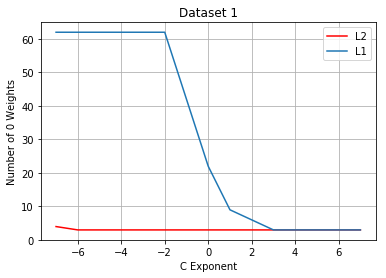

In [33]:
fig, ax = plt.subplots()
ax.plot(C_exp, l2_model_numzeros[1],'r', label="L2")
ax.plot(C_exp, l1_model_numzeros[1], label="L1")
plt.xlabel("C Exponent")
plt.ylabel("Number of 0 Weights")
plt.title("Dataset 1")
plt.legend()
ax.grid()
fig.savefig("favorite_feature_selection.png")
plt.show()